In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

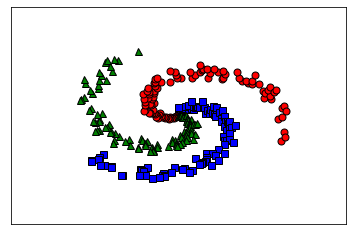

In [13]:
N = 100  # number of points per class
d0 = 2  # dimensionality
C = 3  # number of classes
X = np.zeros((N*C, d0))  # data matrix (each row = single example)
y = np.zeros(N*C, dtype='uint8')  # class labels

for j in range(C):
    ix = range(N*j, N*(j+1))
    r = np.linspace(0.0, 1, N)  # radius
    t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*0.2  # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j
# lets visualize the data:
# plt.scatter(X[:N, 0], X[:N, 1], c=y[:N], s=40, cmap=plt.cm.Spectral)

plt.plot(X[:N, 0], X[:N, 1], 'bs', markersize=7, markeredgecolor='k')
plt.plot(X[N:2*N, 0], X[N:2*N, 1], 'ro', markersize=7, markeredgecolor='k')
plt.plot(X[2*N:, 0], X[2*N:, 1], 'g^', markersize=7, markeredgecolor='k')
# plt.axis('off')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])
# filename = 'EX.pdf'
# with PdfPages(filename) as pdf:
# plt.savefig(bbox_inches='tight')
# plt.savefig('EX.png', bbox_inches='tight', dpi = 600)
plt.show()


# deploy algorithm

In [11]:
def softmax_stable(Z):
    """
    Compute softmax values for each sets of scores in Z.
    each row of Z is a set of scores.    
    """
    e_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    A = e_Z / e_Z.sum(axis=1, keepdims=True)
    return A


def crossentropy_loss(Yhat, Y):
    """
    Yhat: a numpy array of shape (Npoints, nClasses) -- predicted output 
    y: a numpy array of shape (Npoints) -- ground truth. We don't need to use 
    the one-hot vector here since most of elements are zeros. When programming 
    in numpy, we need to use the corresponding indexes only.
    """
    id0 = range(Yhat.shape[0])
    return -np.mean(np.log(Yhat[id0, y]))


def mlp_init(d0, d1, d2):
    """ 
    Initialize W1, b1, W2, b2 
    d0: dimension of input data 
    d1: number of hidden unit 
    d2: number of output unit = number of classes
    """
    W1 = 0.01*np.random.randn(d0, d1)
    b1 = np.zeros(d1)
    W2 = 0.01*np.random.randn(d1, d2)
    b2 = np.zeros(d2)
    return (W1, b1, W2, b2)


def mlp_predict(X, W1, b1, W2, b2):
    """
    Suppose that the network has been trained, predict class of new points. 
    X: data matrix, each ROW is one data point.
    W1, b1, W2, b2: learned weight matrices and biases 
    """
    Z1 = X.dot(W1) + b1  # shape (N, d1)
    A1 = np.maximum(Z1, 0)  # shape (N, d1)
    Z2 = A1.dot(W2) + b2  # shape (N, d2)
    A2 = softmax_stable(Z2)
    return np.argmax(A2, axis=1)


def mlp_fit(X, y, W1, b1, W2, b2, eta):
    loss_hist = []
    N = X.shape[0]
    for i in range(10000):
        # feedforward
        Z1 = X.dot(W1) + b1  # shape (N, d1)
        A1 = np.maximum(Z1, 0)  # shape (N, d1)
        Z2 = A1.dot(W2) + b2  # shape (N, d2)
        Yhat = softmax_stable(Z2)  # shape (N, d2)

        if i % 2000 == 0:
            # print and save loss after each 2000 iterations
            loss = crossentropy_loss(Yhat, y)
            print('iter %d, loss: %f' % (i, loss))
            loss_hist.append(loss)

        # back propagation
        id0 = range(Yhat.shape[0])
        Yhat[id0, y] -= 1
        E2 = Yhat/N  # shape (N, d2)
        dW2 = np.dot(A1.T, E2)  # shape (d1, d2)
        db2 = np.sum(E2, axis=0)  # shape (d2,)
        E1 = np.dot(E2, W2.T)  # shape (N, d1)
        E1[Z1 <= 0] = 0  # gradient of ReLU, shape (N, d1)
        dW1 = np.dot(X.T, E1)  # shape (d0, d1)
        db1 = np.sum(E1, axis=0)  # shape (d1,)

        # Gradient Descent update
        W1 += -eta*dW1
        b1 += -eta*db1
        W2 += -eta*dW2
        b2 += -eta*db2
    return (W1, b1, W2, b2, loss_hist)


In [14]:
d0 = 2
d1 = h = 100 # size of hidden layer
d2 = C = 3
eta = 1 # learning rate
# initialize parameters randomly
(W1, b1, W2, b2) = mlp_init(d0, d1, d2)
(W1, b1, W2, b2, loss_hist) =mlp_fit(X, y, W1, b1, W2, b2, eta)

y_pred = mlp_predict(X, W1, b1, W2, b2)
acc = 100*np.mean(y_pred == y)
print('training accuracy: %.2f %%' % acc)

iter 0, loss: 1.098448
iter 2000, loss: 0.061015
iter 4000, loss: 0.033295
iter 6000, loss: 0.025573
iter 8000, loss: 0.022067
training accuracy: 99.33 %


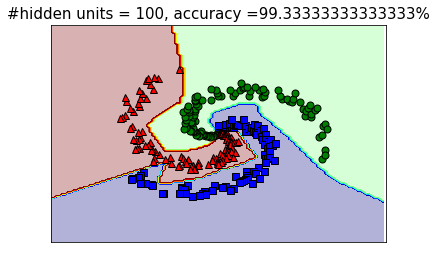

In [15]:
# Visualize results
xm = np.arange(-1.5, 1.5, 0.025)
xlen = len(xm)
ym = np.arange(-1.5, 1.5, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym)

# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# xx.ravel(), yy.ravel()
# print(np.ones((1, xx.size)).shape)
xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)
X0 = np.vstack((xx1, yy1)).T
Z = mlp_predict(X0, W1, b1, W2, b2)
Z = Z.reshape(xx.shape)

plt.clf()
CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha = .3)

# N = 100
# print(N)
plt.plot(X[:N, 0], X[:N, 1], 'bs', markersize = 7, markeredgecolor = 'k')
plt.plot(X[N:2*N, 0], X[N:2*N, 1], 'go', markersize = 7, markeredgecolor = 'k')
plt.plot(X[2*N:, 0], X[2*N:, 1], 'r^', markersize = 7, markeredgecolor = 'k')

# plt.axis('off')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xticks(())
plt.yticks(())
str0 = '#hidden units = ' + str(d1) + ', accuracy =' + str(acc) + '%'
plt.title(str0, fontsize = 15)

# filename = 'ex_res'+ str(d1) + '.pdf'
# with PdfPages(filename) as pdf:
#     pdf.savefig(bbox_inches='tight')
plt.show()

# weight decay with sklearn

In [6]:
import numpy as np
from sklearn.neural_network import MLPClassifier

c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


training accuracy: 100.00 %


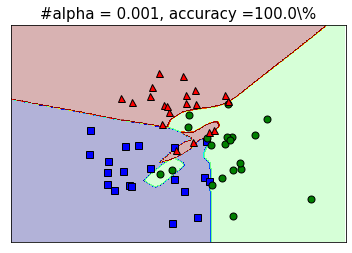

c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


training accuracy: 100.00 %


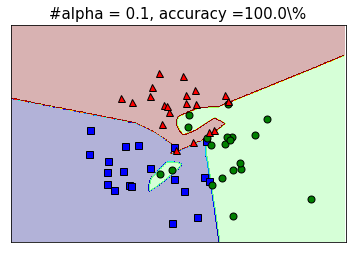

c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


training accuracy: 80.00 %


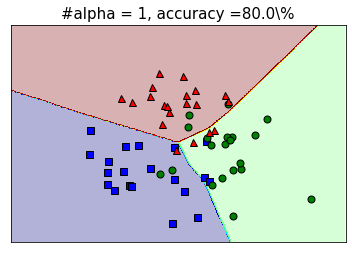

training accuracy: 80.00 %


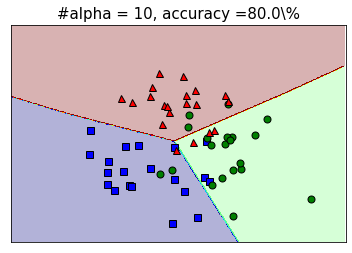

training accuracy: 33.33 %


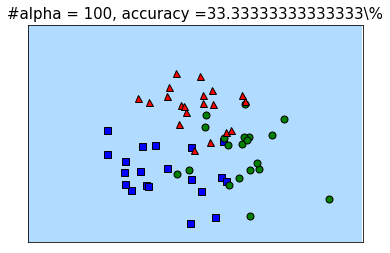

In [10]:
np.random.seed(1)
means = [[-1, -1], [1, -1], [0, 1]]
cov = [[1, 0], [0, 1]]
N = 20
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis=0)
y = np.asarray([0]*N + [1]*N + [2]*N)

alphas = [1e-3, 0.1, 1, 10, 100]  # regularization parameter
# filename = 'nn_overfitting_0001.pdf'
for alpha in alphas:
    clf = MLPClassifier(solver='lbfgs', alpha=alpha, hidden_layer_sizes=(100))
    clf.fit(X, y)
    y_pred = clf.predict(X)
    acc = 100*np.mean(y_pred == y)
    print('training accuracy: %.2f %%' % acc)

    xm = np.arange(-4, 4, 0.025)
    xlen = len(xm)
    ym = np.arange(-4, 4, 0.025)
    ylen = len(ym)
    xx, yy = np.meshgrid(xm, ym)

    # xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # xx.ravel(), yy.ravel()
    # print(np.ones((1, xx.size)).shape)
    xx1 = xx.ravel().reshape(1, xx.size)
    yy1 = yy.ravel().reshape(1, yy.size)
    X0 = np.vstack((xx1, yy1)).T
    Z = clf.predict(X0)
    Z = Z.reshape(xx.shape)

    plt.clf()
    CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha=.3)

    # N = 100
    # print(N)
    plt.plot(X[:N, 0], X[:N, 1], 'bs', markersize=7, markeredgecolor='k')
    plt.plot(X[N:2*N, 0], X[N:2*N, 1], 'go', markersize=7, markeredgecolor='k')
    plt.plot(X[2*N:, 0], X[2*N:, 1], 'r^', markersize=7, markeredgecolor='k')

    # plt.axis('off')
    # plt.xlim([-1.5, 1.5])
    # plt.ylim([-1.5, 1.5])
    cur_axes = plt.gca()
    cur_axes.axes.get_xaxis().set_ticks([])
    cur_axes.axes.get_yaxis().set_ticks([])

    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    plt.xticks(())
    plt.yticks(())
    str0 = '#alpha = ' + str(alpha) + ', accuracy =' + str(acc) + '%'
    plt.title(str0, fontsize=15)
    # with PdfPages(filename) as pdf:
    #     pdf.savefig(bbox_inches='tight')
    plt.show()
